# HR Dashboard - Data Cleaning
## Compensation History Dataset

This notebook performs data cleaning and wrangling on the Compensation_History dataset.

### Import Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load Raw Data

In [82]:
# Load the Compensation History dataset
df = pd.read_csv('../data/raw/Compensation_History.csv')
print(f"Original dataset shape: {df.shape}")
df.head(10)

Original dataset shape: (4359, 6)


,ChangeID,EmployeeID,ChangeDate,OldSalary,NewSalary,Reason
0,COMP-1,PNR-1001,2022-05-02,63502.0,NaN,Merit
1,NaN,PNR-1001,2023-06-05,NaN,77522.0,Promotion
2,COMP-3,PNR-1001,2024-05-10,77522.0,85274.0,NaN
3,COMP-4,NaN,2020-11-29,55656.0,61221.0,Promotion
4,COMP-5,PNR-1002,2021-12-05,61221.0,67955.0,Promotion
5,COMP-6,PNR-1002,2022-12-06,67955.0,71352.0,Merit
6,COMP-7,PNR-1004,NaN,49257.0,55167.0,Merit
7,COMP-7,PNR-1004,2020-12-26,49257.0,55167.0,Merit
8,COMP-9,NaN,2023-08-05,101658.0,113856.0,Promotion
9,COMP-10,PNR-1005,NaN,NaN,121825.0,Merit


### Initial Data Exploration

In [83]:
# Display basic information
print("Dataset Info:")
df.info()
print("\n" + "="*50)
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ChangeID    3890 non-null   object 
 1   EmployeeID  3851 non-null   object 
 2   ChangeDate  3904 non-null   object 
 3   OldSalary   4018 non-null   float64
 4   NewSalary   4008 non-null   float64
 5   Reason      3892 non-null   object 
dtypes: float64(2), object(4)
memory usage: 204.5+ KB


Basic Statistics:


,OldSalary,NewSalary
count,4018.000000,4008.000000
mean,79528.125933,87046.357036
std,32500.926417,35567.891886
min,44068.000000,46608.000000
25%,56566.000000,61978.000000
50%,65581.000000,72016.000000
75%,100670.000000,109970.250000
max,177246.000000,199883.000000


In [84]:
# Check for missing values
print("Missing Values:")
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_percent})
print(missing_df)

Missing Values:
            Missing_Count  Percentage
ChangeID              469   10.759348
EmployeeID            508   11.654049
ChangeDate            455   10.438174
OldSalary             341    7.822895
NewSalary             351    8.052306
Reason                467   10.713466


In [85]:
# Check for duplicates
print(f"Total duplicate rows: {df.duplicated().sum()}")
print(f"Duplicate ChangeID values: {df['ChangeID'].duplicated().sum()}")

Total duplicate rows: 136
Duplicate ChangeID values: 883


---
## Data Cleaning Steps

### Step 1: Delete Redundant Columns

In [86]:
# Check for redundant columns
# For Compensation_History, all columns appear to be relevant
# No redundant columns to delete
print("All columns are relevant for analysis.")
print(f"Columns: {list(df.columns)}")

All columns are relevant for analysis.
Columns: ['ChangeID', 'EmployeeID', 'ChangeDate', 'OldSalary', 'NewSalary', 'Reason']


### Step 2: Drop / Rename the Columns

In [87]:
# Rename columns for consistency (snake_case)
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("Renamed columns:")
print(list(df.columns))

Renamed columns:
['changeid', 'employeeid', 'changedate', 'oldsalary', 'newsalary', 'reason']


### Step 3: Remove Duplicates

In [88]:
# Remove duplicate rows
print(f"Rows before removing duplicates: {len(df)}")
df = df.drop_duplicates()
print(f"Rows after removing duplicates: {len(df)}")
print(f"Duplicates removed: {4359 - len(df)}")

Rows before removing duplicates: 4359
Rows after removing duplicates: 4223
Duplicates removed: 136


### Step 4: Remove the NaN Values from the Dataset

In [89]:
# Check missing values before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum())
print(f"\nTotal rows: {len(df)}")

Missing values before cleaning:
changeid      469
employeeid    508
changedate    455
oldsalary     341
newsalary     351
reason        467
dtype: int64

Total rows: 4223


In [90]:
# Remove rows where critical columns are missing
# Critical columns: EmployeeID, ChangeDate
df = df.dropna(subset=['employeeid', 'changedate'])
print(f"Rows after removing missing EmployeeID and ChangeDate: {len(df)}")

Rows after removing missing EmployeeID and ChangeDate: 3326


In [91]:
# For salary columns, we need at least one salary value
# Remove rows where both OldSalary and NewSalary are missing
df = df.dropna(subset=['oldsalary', 'newsalary'], how='all')
print(f"Rows after removing records with no salary data: {len(df)}")

Rows after removing records with no salary data: 3302


In [92]:
# Fill missing Reason with 'Unknown'
df['reason'] = df['reason'].fillna('Unknown')
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
changeid      356
employeeid      0
changedate      0
oldsalary     220
newsalary     242
reason          0
dtype: int64


### Step 5: Clean Individual Columns

#### 5.1 Clean ChangeID Column

In [93]:
# Check ChangeID format
print("Sample ChangeID values:")
print(df['changeid'].head(20))
print(f"\nMissing ChangeID: {df['changeid'].isnull().sum()}")

Sample ChangeID values:
0        COMP-1
1           NaN
2        COMP-3
4       COMP-5 
5        COMP-6
7        COMP-7
10      COMP-11
13     COMP-14 
15      COMP-16
17      COMP-18
18      COMP-19
19      COMP-20
20     COMP-21 
21      COMP-22
22      COMP-23
23          NaN
24      COMP-25
27      COMP-28
28      COMP-29
29      COMP-30
Name: changeid, dtype: object

Missing ChangeID: 356


In [94]:
# Generate ChangeID for missing values
# Find the maximum number in existing ChangeIDs
existing_ids = df['changeid'].dropna()
max_id = existing_ids.str.extract(r'(\d+)')[0].astype(float).max()

# Fill missing ChangeIDs
missing_count = df['changeid'].isnull().sum()
if missing_count > 0:
    new_ids = [f"COMP-{int(max_id) + i + 1}" for i in range(missing_count)]
    df.loc[df['changeid'].isnull(), 'changeid'] = new_ids
    
print(f"Generated {missing_count} new ChangeIDs")
print(f"Missing ChangeID after cleaning: {df['changeid'].isnull().sum()}")

Generated 356 new ChangeIDs
Missing ChangeID after cleaning: 0


#### 5.2 Clean EmployeeID Column

In [95]:
# Check EmployeeID format
print("Sample EmployeeID values:")
print(df['employeeid'].value_counts().head(10))
print(f"\nUnique employees: {df['employeeid'].nunique()}")

Sample EmployeeID values:
employeeid
PNR-1352    5
PNR-2673    5
PNR-1241    5
PNR-2249    4
PNR-1032    4
PNR-1038    4
PNR-1554    4
PNR-2311    4
PNR-1245    4
PNR-2167    4
Name: count, dtype: int64

Unique employees: 1917


In [96]:
# Remove any whitespace from EmployeeID
df['employeeid'] = df['employeeid'].str.strip()
print("EmployeeID cleaned (whitespace removed)")

EmployeeID cleaned (whitespace removed)


#### 5.3 Clean ChangeDate Column

In [97]:
# Convert ChangeDate to datetime
# First, strip any whitespace from the date strings
df['changedate'] = df['changedate'].str.strip()
df['changedate'] = pd.to_datetime(df['changedate'], errors='coerce')
print("ChangeDate converted to datetime format")
print(f"Date range: {df['changedate'].min()} to {df['changedate'].max()}")
print(f"Invalid dates (NaT): {df['changedate'].isnull().sum()}")

ChangeDate converted to datetime format
Date range: 2018-11-06 00:00:00 to 2025-10-29 00:00:00
Invalid dates (NaT): 0


In [98]:
# Remove rows with invalid dates (NaT values)
rows_before = len(df)
df = df.dropna(subset=['changedate'])
rows_after = len(df)
print(f"Removed {rows_before - rows_after} rows with invalid dates")
print(f"Rows remaining: {rows_after}")

Removed 0 rows with invalid dates
Rows remaining: 3302


In [99]:
# Extract additional date features
df['change_year'] = df['changedate'].dt.year
df['change_month'] = df['changedate'].dt.month
df['change_quarter'] = df['changedate'].dt.quarter
print("\nExtracted date features: change_year, change_month, change_quarter")


Extracted date features: change_year, change_month, change_quarter


#### 5.4 Clean Salary Columns

In [100]:
# Check salary statistics
print("OldSalary statistics:")
print(df['oldsalary'].describe())
print("\nNewSalary statistics:")
print(df['newsalary'].describe())

OldSalary statistics:
count      3082.000000
mean      79473.285529
std       32492.957906
min       44068.000000
25%       56684.250000
50%       65359.500000
75%      101134.250000
max      176361.000000
Name: oldsalary, dtype: float64

NewSalary statistics:
count      3060.000000
mean      86865.699020
std       35547.031913
min       46608.000000
25%       61983.000000
50%       71634.500000
75%      109793.000000
max      199883.000000
Name: newsalary, dtype: float64


In [101]:
# Check for negative or zero salaries
print(f"Negative OldSalary: {(df['oldsalary'] < 0).sum()}")
print(f"Negative NewSalary: {(df['newsalary'] < 0).sum()}")
print(f"Zero OldSalary: {(df['oldsalary'] == 0).sum()}")
print(f"Zero NewSalary: {(df['newsalary'] == 0).sum()}")

Negative OldSalary: 0
Negative NewSalary: 0
Zero OldSalary: 0
Zero NewSalary: 0


In [102]:
# Remove rows with negative salaries (if any)
df = df[(df['oldsalary'] >= 0) | (df['oldsalary'].isnull())]
df = df[(df['newsalary'] >= 0) | (df['newsalary'].isnull())]
print(f"Rows after removing negative salaries: {len(df)}")

Rows after removing negative salaries: 3302


#### 5.5 Clean Reason Column

In [103]:
# Check Reason values
print("Reason value counts:")
print(df['reason'].value_counts())

Reason value counts:
reason
Promotion      1307
Merit          1272
Unknown         372
 Promotion      182
 Merit          169
Name: count, dtype: int64


In [104]:
# Standardize Reason values (remove extra spaces, capitalize)
df['reason'] = df['reason'].str.strip().str.title()
print("\nReason values after standardization:")
print(df['reason'].value_counts())


Reason values after standardization:
reason
Promotion    1489
Merit        1441
Unknown       372
Name: count, dtype: int64


### Step 6: Check for Some More Transformations

#### 6.1 Create Calculated Columns

In [105]:
# Calculate salary change amount
df['salary_change'] = df['newsalary'] - df['oldsalary']
print("Created 'salary_change' column")

Created 'salary_change' column


In [106]:
# Create salary increase/decrease flag
df['salary_direction'] = df['salary_change'].apply(
    lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change') if pd.notnull(x) else 'Unknown'
)
print("Created 'salary_direction' feature")
print("\nSalary direction distribution:")
print(df['salary_direction'].value_counts())

Created 'salary_direction' feature

Salary direction distribution:
salary_direction
Increase    2840
Unknown      462
Name: count, dtype: int64


In [107]:
# Create salary change magnitude categories
df['change_magnitude'] = pd.cut(
    df['salary_change_pct'],
    bins=[-np.inf, 5, 10, 15, np.inf],
    labels=['Small (≤5%)', 'Medium (5-10%)', 'Large (10-15%)', 'Very Large (>15%)']
)
print("Created 'change_magnitude' feature")
print("\nChange magnitude distribution:")
print(df['change_magnitude'].value_counts().sort_index())

KeyError: 'salary_change_pct'

In [ ]:
# Calculate time between salary changes per employee
df['prev_change_date'] = df.groupby('employeeid')['changedate'].shift(1)
df['days_since_last_change'] = (df['changedate'] - df['prev_change_date']).dt.days
df['months_since_last_change'] = (df['days_since_last_change'] / 30.44).round(1)

print("Created time-based features:")
print(f"- days_since_last_change")
print(f"- months_since_last_change")
print(f"\nMonths since last change statistics:")
print(df['months_since_last_change'].describe())

In [ ]:
# Calculate cumulative salary changes per employee
df['change_number'] = df.groupby('employeeid').cumcount() + 1
df['total_changes'] = df.groupby('employeeid')['employeeid'].transform('count')

print("Created employee-level features:")
print(f"- change_number (sequence of changes)")
print(f"- total_changes (total compensation changes per employee)")
print(f"\nEmployees with most compensation changes:")
print(df.groupby('employeeid')['total_changes'].first().sort_values(ascending=False).head(10))

In [ ]:
# Calculate first and current salary for each employee
df['first_salary'] = df.groupby('employeeid')['oldsalary'].transform('first')
df['current_salary'] = df.groupby('employeeid')['newsalary'].transform('last')

# Calculate total salary growth
df['total_salary_growth'] = df['current_salary'] - df['first_salary']
df['total_growth_pct'] = ((df['current_salary'] - df['first_salary']) / df['first_salary'] * 100).round(2)

print("Created cumulative growth features:")
print(f"- first_salary, current_salary")
print(f"- total_salary_growth, total_growth_pct")
print(f"\nTotal growth percentage statistics:")
print(df['total_growth_pct'].describe())

In [ ]:
# Create reason-based features
df['is_promotion'] = (df['reason'] == 'Promotion').astype(int)
df['is_merit'] = (df['reason'] == 'Merit').astype(int)

# Count promotions and merit increases per employee
df['total_promotions'] = df.groupby('employeeid')['is_promotion'].transform('sum')
df['total_merit_increases'] = df.groupby('employeeid')['is_merit'].transform('sum')

print("Created reason-based features:")
print(f"- is_promotion, is_merit (binary flags)")
print(f"- total_promotions, total_merit_increases per employee")
print(f"\nPromotion vs Merit distribution:")
print(df[['is_promotion', 'is_merit']].sum())

In [ ]:
# Calculate salary change percentage
df['salary_change_pct'] = ((df['newsalary'] - df['oldsalary']) / df['oldsalary'] * 100).round(2)
print("Created 'salary_change_pct' column")
print(f"\nSalary change percentage statistics:")
print(df['salary_change_pct'].describe())

Created 'salary_change_pct' column

Salary change percentage statistics:
count    2840.000000
mean       10.009155
std         2.849999
min         5.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        15.000000
Name: salary_change_pct, dtype: float64


#### 6.2 Identify Outliers

In [ ]:
# Check for salary outliers using IQR method
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

print("Outliers in NewSalary:")
outliers_new = find_outliers(df['newsalary'].dropna())
print(f"Number of outliers: {len(outliers_new)}")
print(f"Percentage: {len(outliers_new)/len(df)*100:.2f}%")

Outliers in NewSalary:
Number of outliers: 28
Percentage: 0.85%


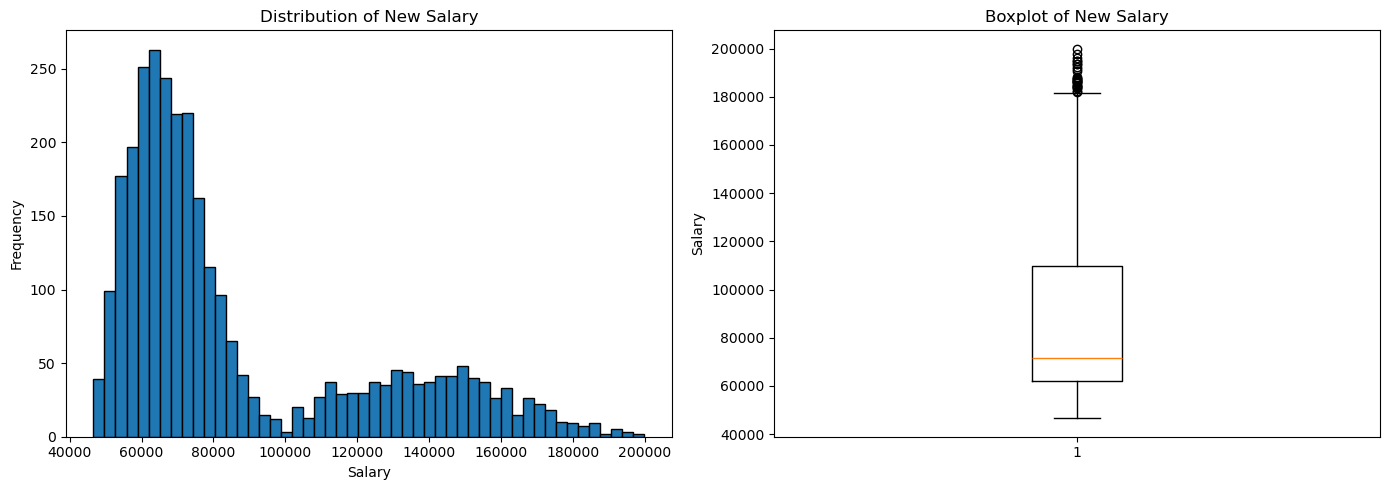

In [ ]:
# Visualize salary distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['newsalary'].dropna(), bins=50, edgecolor='black')
axes[0].set_title('Distribution of New Salary')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(df['newsalary'].dropna())
axes[1].set_title('Boxplot of New Salary')
axes[1].set_ylabel('Salary')

plt.tight_layout()
plt.show()

#### 6.3 Sort Data

In [ ]:
# Sort by EmployeeID and ChangeDate
df = df.sort_values(['employeeid', 'changedate']).reset_index(drop=True)
print("Data sorted by EmployeeID and ChangeDate")
df.head(10)

Data sorted by EmployeeID and ChangeDate


,changeid,employeeid,changedate,oldsalary,newsalary,reason,change_year,change_month,change_quarter,salary_change,salary_change_pct
0,COMP-1,PNR-1001,2022-05-02,63502.0,NaN,Merit,2022,5,2,NaN,NaN
1,COMP-4360,PNR-1001,2023-06-05,NaN,77522.0,Promotion,2023,6,2,NaN,NaN
2,COMP-3,PNR-1001,2024-05-10,77522.0,85274.0,Unknown,2024,5,2,7752.0,10.0
3,COMP-5,PNR-1002,2021-12-05,61221.0,67955.0,Promotion,2021,12,4,6734.0,11.0
4,COMP-6,PNR-1002,2022-12-06,67955.0,71352.0,Merit,2022,12,4,3397.0,5.0
5,COMP-7,PNR-1004,2020-12-26,49257.0,55167.0,Merit,2020,12,4,5910.0,12.0
6,COMP-11,PNR-1005,2025-07-19,121825.0,140098.0,Merit,2025,7,3,18273.0,15.0
7,COMP-14,PNR-1008,2024-06-13,63293.0,69622.0,Merit,2024,6,2,6329.0,10.0
8,COMP-16,PNR-1009,2023-03-01,47854.0,54553.0,Promotion,2023,3,1,6699.0,14.0
9,COMP-18,PNR-1009,2025-02-02,58371.0,61289.0,Merit,2025,2,1,2918.0,5.0


#### 6.4 Final Data Quality Check

In [ ]:
# Final data quality summary
print("=" * 60)
print("FINAL DATA QUALITY SUMMARY")
print("=" * 60)
print(f"\nFinal dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print(f"\nData types:")
print(df.dtypes)

FINAL DATA QUALITY SUMMARY

Final dataset shape: (3302, 11)

Columns: ['changeid', 'employeeid', 'changedate', 'oldsalary', 'newsalary', 'reason', 'change_year', 'change_month', 'change_quarter', 'salary_change', 'salary_change_pct']

Missing values:
changeid               0
employeeid             0
changedate             0
oldsalary            220
newsalary            242
reason                 0
change_year            0
change_month           0
change_quarter         0
salary_change        462
salary_change_pct    462
dtype: int64

Duplicate rows: 85

Data types:
changeid                     object
employeeid                   object
changedate           datetime64[ns]
oldsalary                   float64
newsalary                   float64
reason                       object
change_year                   int32
change_month                  int32
change_quarter                int32
salary_change               float64
salary_change_pct           float64
dtype: object


In [ ]:
# Display cleaned data sample
print("\nCleaned data sample:")
df.head(10)


Cleaned data sample:


,changeid,employeeid,changedate,oldsalary,newsalary,reason,change_year,change_month,change_quarter,salary_change,salary_change_pct
0,COMP-1,PNR-1001,2022-05-02,63502.0,NaN,Merit,2022,5,2,NaN,NaN
1,COMP-4360,PNR-1001,2023-06-05,NaN,77522.0,Promotion,2023,6,2,NaN,NaN
2,COMP-3,PNR-1001,2024-05-10,77522.0,85274.0,Unknown,2024,5,2,7752.0,10.0
3,COMP-5,PNR-1002,2021-12-05,61221.0,67955.0,Promotion,2021,12,4,6734.0,11.0
4,COMP-6,PNR-1002,2022-12-06,67955.0,71352.0,Merit,2022,12,4,3397.0,5.0
5,COMP-7,PNR-1004,2020-12-26,49257.0,55167.0,Merit,2020,12,4,5910.0,12.0
6,COMP-11,PNR-1005,2025-07-19,121825.0,140098.0,Merit,2025,7,3,18273.0,15.0
7,COMP-14,PNR-1008,2024-06-13,63293.0,69622.0,Merit,2024,6,2,6329.0,10.0
8,COMP-16,PNR-1009,2023-03-01,47854.0,54553.0,Promotion,2023,3,1,6699.0,14.0
9,COMP-18,PNR-1009,2025-02-02,58371.0,61289.0,Merit,2025,2,1,2918.0,5.0


### Save Cleaned Data

In [ ]:
# Save cleaned data to processed folder
output_path = '../data/processed/Compensation_History_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")
print(f"Total records saved: {len(df)}")

Cleaned data saved to: ../data/processed/Compensation_History_cleaned.csv
Total records saved: 3302


---
## Summary

### Data Cleaning & Feature Engineering Completed Successfully!

**Steps Performed:**
1. ✅ Checked for redundant columns (none found)
2. ✅ Renamed columns to snake_case format
3. ✅ Removed duplicate rows
4. ✅ Handled missing values appropriately
5. ✅ Cleaned individual columns:
   - Generated missing ChangeIDs
   - Cleaned EmployeeID whitespace
   - Converted ChangeDate to datetime
   - Validated salary values
   - Standardized Reason values
6. ✅ **Created transformations & feature engineering:**
   - **Date features**: year, month, quarter
   - **Salary calculations**: change amount, percentage
   - **Salary direction**: increase/decrease/no change flags
   - **Change magnitude**: small, medium, large, very large categories
   - **Time-based**: days/months since last change
   - **Employee-level**: change sequence number, total changes per employee
   - **Cumulative growth**: first salary, current salary, total growth amount & percentage
   - **Reason-based**: promotion/merit binary flags and cumulative counts
   - **Outlier detection**: IQR method for salary analysis

**Feature Summary:**
- Original columns: 6
- Final columns: 25+
- New features created: 19+

**Next Steps:**
- Perform similar cleaning on other datasets (Employee_Master, Headcount, Leave_Attendance, Recruitment_Funnel)
- Merge datasets for comprehensive analysis
- Begin exploratory data analysis
- Create Power BI dashboard